<a href="https://colab.research.google.com/github/PremSagar2002/Leukemia-Cancer-Prediction-in-Blood-Cells-Using-CNN/blob/main/LEUKEMIA_CANCER_PREDICTION_IN_BLOOD_CELLS_USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os,sys
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split

from keras import *
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, SGD , RMSprop
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#Ignoring the warnings and intialising the GPU

In [ ]:
import torch
import warnings
warnings.filterwarnings('ignore')
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
#Importing the Leukemia dataset from google drive and unzip the content

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/cancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: cancer/test/Normal/_5_7634.jpeg  
  inflating: cancer/test/Normal/_5_8417.jpeg  
  inflating: cancer/test/Normal/_5_8465.jpeg  
  inflating: cancer/test/Normal/_5_8557.jpeg  
  inflating: cancer/test/Normal/_5_876.jpeg  
  inflating: cancer/test/Normal/_5_8803.jpeg  
  inflating: cancer/test/Normal/_5_8899.jpeg  
  inflating: cancer/test/Normal/_5_890.jpeg  
  inflating: cancer/test/Normal/_5_9173.jpeg  
  inflating: cancer/test/Normal/_5_9176.jpeg  
  inflating: cancer/test/Normal/_5_9201.jpeg  
  inflating: cancer/test/Normal/_5_9208.jpeg  
  inflating: cancer/test/Normal/_5_9257.jpeg  
  inflating: cancer/test/Normal/_5_9302.jpeg  
  inflating: cancer/test/Normal/_5_9321.jpeg  
  inflating: cancer/test/Normal/_5_9347.jpeg  
  inflating: cancer/test/Normal/_5_9361.jpeg  
  inflating: cancer/test/Normal/_5_937.jpeg  
  inflating: cancer/test/Normal/_5_9665.jpeg  
  inflating: cancer/test/Normal/_5_9755.jpeg  
  inflating:

In [ ]:
!unzip /content/gdrive/MyDrive/cancer.zip >/dev/null

replace cancer/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
#Creating the labels and pprinting the floders in the directory

In [ ]:

LABELS = ["Normal", "Cancer"]
print(os.listdir("/content/cancer"))


['.DS_Store', 'val', 'train', 'test']


In [ ]:
print(os.listdir("cancer/train"))

print(os.listdir("cancer/test"))

TRAIN_DIR = "cancer/train/"
TEST_DIR =  "cancer/test/"

['Normal', 'Cancer']
['Normal', 'Cancer']


In [ ]:
#Preprossing the dataset and adding the labels to each image accordingly

In [ ]:

def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['Cancer']:
                label = 0
            elif nextdir in ['Normal']:
                label = 1
            else:
                label = 2
    return nextdir, label
def preprocessing_data(Dir):
    X = []
    y = []

    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir

        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)

    X = np.asarray(X)
    y = np.asarray(y)

    return X,y

In [ ]:
#Spliting the training data into X_train and y_train

In [ ]:
import cv2
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['Cancer']:
                label = 0
            elif nextDir in ['Normal']:
                label = 1
            else:
                label = 2

            temp = Dir + nextDir

            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)

    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(TRAIN_DIR)

100%|██████████| 2478/2478 [00:29<00:00, 85.40it/s]


In [ ]:
#spliting the test dataset  into  X_test and Y_test

In [ ]:
X_test , y_test = get_data(TEST_DIR)
print(X_train.shape,'\n',X_test.shape)
print(y_train.shape,'\n',y_test.shape)
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print(y_train.shape,'\n',y_test.shape)
Pimages = os.listdir(TRAIN_DIR + "Cancer")
Nimages = os.listdir(TRAIN_DIR + "Normal")

100%|██████████| 620/620 [00:11<00:00, 54.17it/s]


(4961, 150, 150, 3) 
 (1240, 150, 150, 3)
(4961,) 
 (1240,)
(4961, 2) 
 (1240, 2)


In [ ]:
#Visualise some images in the dataset

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


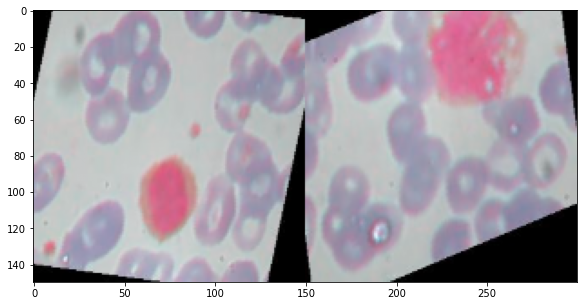

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


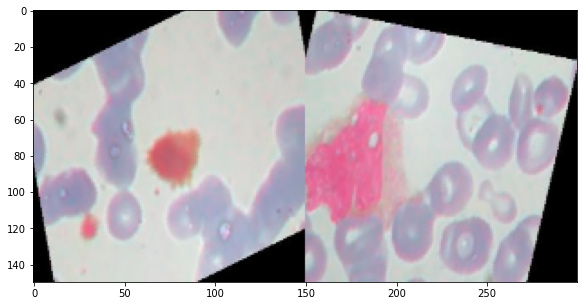

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


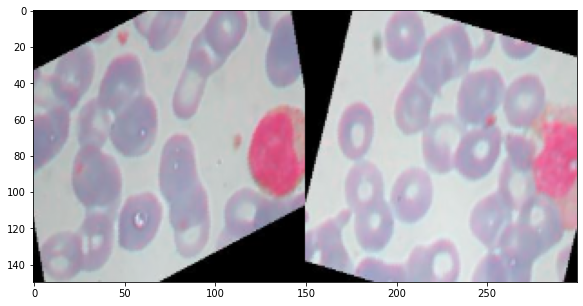

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


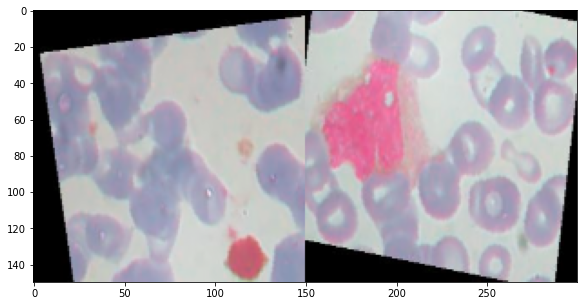

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


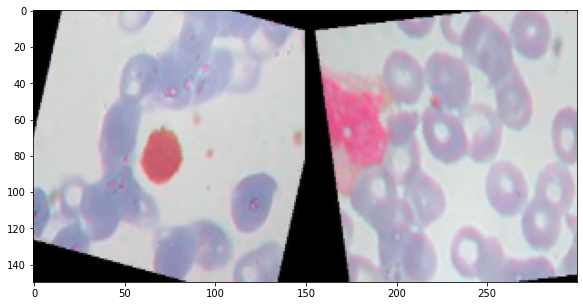

In [ ]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"Cancer/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"Normal/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No CANCER Vs (Right) - CANCER")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

#function
def train_test_rmse(x,y):
    x = Iris_data[x]
    y = Iris_data[y]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(accuracy_score(y_test, y_pred))  # or you can save it in variable and return it
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
#plot the no.of Normal images and the images that is affected by Leukemia cancer

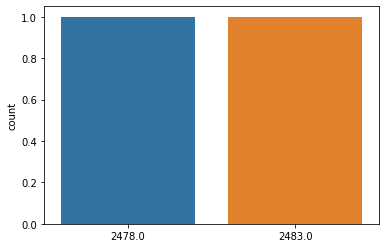

In [ ]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
from keras import *
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, SGD , RMSprop
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#Building the Convolutional Neural Network

In [ ]:


model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

print(model.summary())
epochs = 10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0

In [ ]:
#Training the dataset and validating the dataset

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,batch_size = 256,
          epochs=epochs)
model.save('Leukemia_cancer_detection.h5')

Epoch 1/10
20/20 [==============================] - 53s 2s/step - loss: 0.7225 - accuracy: 0.5142 - val_loss: 0.6936 - val_accuracy: 0.5000 - lr: 5.0000e-05
Epoch 2/10
20/20 [==============================] - 22s 1s/step - loss: 0.6942 - accuracy: 0.5263 - val_loss: 0.6925 - val_accuracy: 0.5000 - lr: 5.0000e-05
Epoch 3/10
20/20 [==============================] - 22s 1s/step - loss: 0.6846 - accuracy: 0.5656 - val_loss: 0.6728 - val_accuracy: 0.5016 - lr: 5.0000e-05
Epoch 4/10
20/20 [==============================] - 22s 1s/step - loss: 0.6710 - accuracy: 0.6162 - val_loss: 0.7000 - val_accuracy: 0.5000 - lr: 5.0000e-05
Epoch 5/10
20/20 [==============================] - 23s 1s/step - loss: 0.6523 - accuracy: 0.6406 - val_loss: 0.6277 - val_accuracy: 0.5306 - lr: 5.0000e-05
Epoch 6/10
20/20 [==============================] - 23s 1s/step - loss: 0.6205 - accuracy: 0.7081 - val_loss: 0.5686 - val_accuracy: 0.8629 - lr: 5.0000e-05
Epoch 7/10
20/20 [==============================] - 23s 1s

In [ ]:
#Plotting the accuracy curve and loss curve

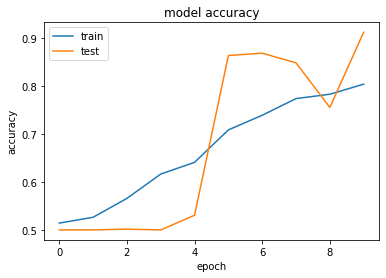

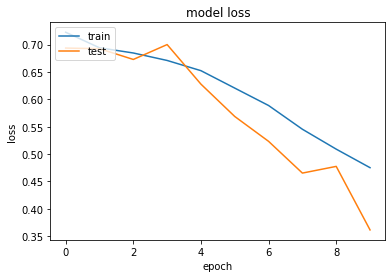

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Plotting the confusion matrix for tbe test dataset

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)


In [ ]:
#prediction on some of the labels

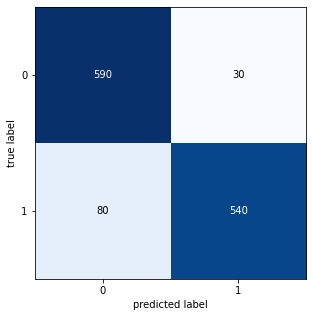

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt
model = load_model('Leukemia_cancer_detection.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

cancer


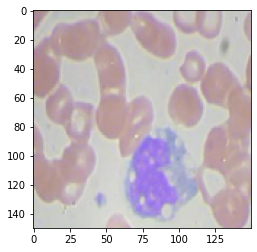

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/cancer/val/Cancer/_2_4392.jpeg', target_size=(150, 150))
imgplot = plt.imshow(img)
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
if classes.any() == [1]:
      print("cancer")
else:

    print("Normal")


Normal


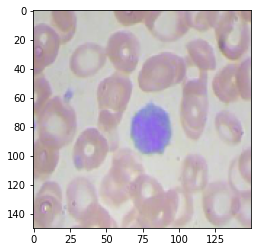

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/cancer/val/Normal/_2_6981.jpeg', target_size=(150, 150))
imgplot = plt.imshow(img)
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
if classes.all() == [1]:
      print("cancer")
else:

    print("Normal")

Normal


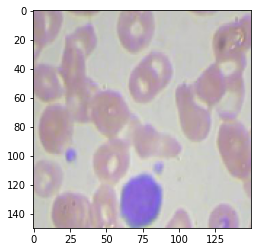

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/cancer/val/Normal/_0_3975.jpeg', target_size=(150, 150))
imgplot = plt.imshow(img)
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
if classes.all() == [1]:
      print("cancer")
else:

    print("Normal")

Normal


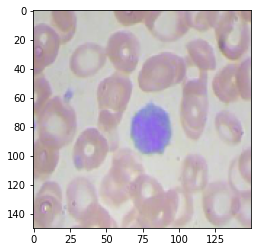

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/cancer/val/Normal/_2_6981.jpeg', target_size=(150, 150))
imgplot = plt.imshow(img)
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
if classes.all() == [1]:
      print("cancer")
else:

    print("Normal")

Normal


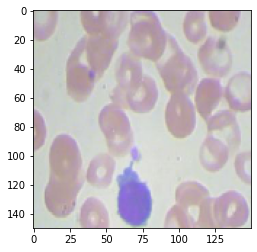

In [ ]:

from keras.preprocessing import image
img = image.load_img('/content/cancer/val/Normal/_3_7545.jpeg', target_size=(150, 150))
imgplot = plt.imshow(img)
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
if classes.all() == [1]:
      print("cancer")
else:

    print("Normal")